In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import TargetEncoder
import joblib


train = pd.read_csv("C:/Users/User/Desktop/utem_pj/Train.csv")
test = pd.read_csv("C:/Users/User/Desktop/utem_pj/Test.csv")
actual = pd.read_csv("C:/Users/User/Desktop/utem_pj/actual_data.csv")
predict = pd.read_csv("C:/Users/User/Desktop/utem_pj/predicted_data.csv")

In [3]:

# Print dataset shapes for verification
print(f"Train data shape: {train.shape}")
print(f"Test data shape: {test.shape}")
print(f"Actual data shape: {actual.shape}")
print(f"Predict data shape: {predict.shape}")


Train data shape: (108082, 12)
Test data shape: (23764, 12)
Actual data shape: (100, 12)
Predict data shape: (100, 11)


In [5]:
target_column = "DiscountPercentage"
features = ["Qty", "DayOfWeek", "HolidayPeriod", "IsWeekend", "Loc_group", "UnitPrice", "Dept", "SubDept", "Category"]


In [7]:
X_train = train[features]
y_train = train[target_column]
X_test = test[features]
y_test = test[target_column]

X_act = actual[features]
y_act = actual[target_column]
X_pred = predict[features]


In [9]:
categorical_columns = ["DayOfWeek", "HolidayPeriod", "Loc_group", "Dept", "SubDept", "Category"]
target_encoder = TargetEncoder(cols=categorical_columns)

In [11]:

# Encode training and test datasets
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)
X_act_encoded = target_encoder.transform(X_act)
X_pred_encoded = target_encoder.transform(X_pred)


In [12]:
X_act_encoded = target_encoder.fit_transform(X_act, y_act)
X_pred_encoded = target_encoder.transform(X_pred)

In [13]:

# Train a 3-NN model
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_encoded, y_train)


KNeighborsRegressor(n_neighbors=3)

In [15]:
# Predict on test and actual datasets
y_test_pred = model.predict(X_test_encoded)
y_act_pred = model.predict(X_act_encoded)

In [17]:

# Evaluate model performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")
print(f"Test R^2: {r2_test}")


Test MSE: 25.076629316987418
Test R^2: 0.030215451015130346


In [19]:
# Evaluate performance on actual dataset
mse_act = mean_squared_error(y_act, y_act_pred)
r2_act = r2_score(y_act, y_act_pred)
print(f"Actual Data MSE: {mse_act}")
print(f"Actual Data R^2: {r2_act}")

Actual Data MSE: 28.139237666666666
Actual Data R^2: 0.04103769344774433


In [20]:

# Predict on the SelectedTest dataset
y_pred = model.predict(X_pred_encoded)
predict["Predicted_DiscountPercentage"] = y_pred


In [21]:

import matplotlib.pyplot as plt

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    "Actual": y_act,
    "Predicted": y_act_pred
})

# Display the first few rows of the comparison
print(comparison_df.head(10))  # Show top 10 rows for quick inspection


   Actual  Predicted
0    0.00   0.000000
1    0.00   3.790000
2    0.00   0.000000
3    0.00   4.000000
4    0.00   0.000000
5    0.00   0.000000
6    3.79   3.790000
7    0.00   0.000000
8    0.00   0.000000
9    0.00   5.616667



Summary of Differences:
           Actual   Predicted  Difference
count  100.000000  100.000000  100.000000
mean     2.748300    1.395267    1.353033
std      5.444247    3.363664    5.155025
min      0.000000    0.000000  -13.700000
25%      0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000
75%      3.790000    0.000000    0.000000
max     24.340000   16.790000   15.560000


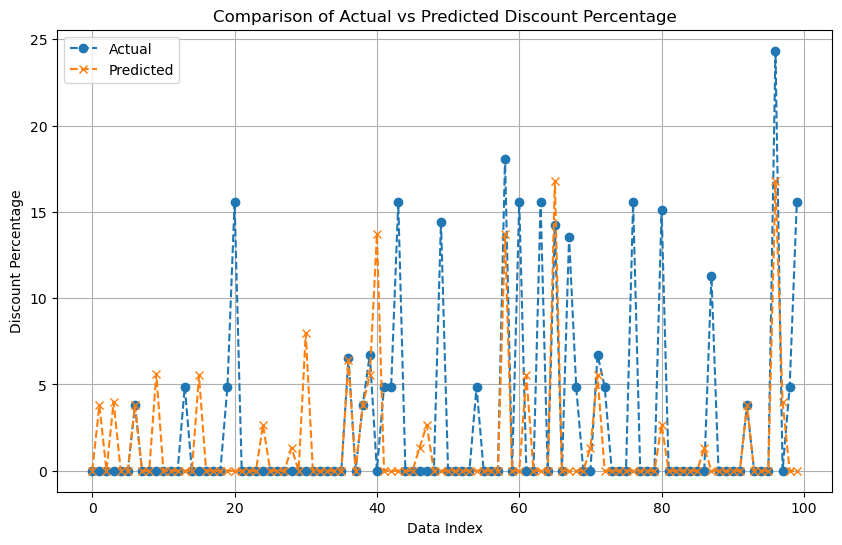

In [22]:

# Calculate differences
comparison_df["Difference"] = comparison_df["Actual"] - comparison_df["Predicted"]
print("\nSummary of Differences:")
print(comparison_df.describe())

# Visualize the comparison
plt.figure(figsize=(10, 6))
plt.plot(comparison_df["Actual"].values, label="Actual", marker='o', linestyle='--')
plt.plot(comparison_df["Predicted"].values, label="Predicted", marker='x', linestyle='--')
plt.title("Comparison of Actual vs Predicted Discount Percentage")
plt.xlabel("Data Index")
plt.ylabel("Discount Percentage")
plt.legend()
plt.grid()
plt.show()


# calculate the predict price

In [29]:
# add the predicted value column data frame
actual['PredictedDiscountPercentage'] = y_act_pred

# Verify the updated DataFrame
print(actual.head())


      BizDate               Dept           SubDept  \
0  2020-05-05  DRIED COMMODITIES              EGGS   
1  2020-05-31   CHILLED & FROZEN         ICE CREAM   
2  2020-05-01   CHILLED & FROZEN  FROZEN PROCESSED   
3  2020-05-18            GROCERY          BEVERAGE   
4  2020-05-09            GROCERY          BEVERAGE   

                       Category                             Description  \
0                     LOCAL EGG          QL DELI FRESH CLASSIC EGG 10'S   
1                           TUB             MILO ICE CREAM STICK FROZEN   
2                PASTRY & YEAST        KG SPRING ROLL PASTRY 500G (8.5)   
3  ASIAN DRINK (NON CARBONATED)  HEAVEN & EARTH 500ML (BTL) - MANGO TEA   
4  ASIAN DRINK (NON CARBONATED)  HEAVEN & EARTH 300ML (TIN) - MANGO TEA   

           HolidayPeriod  IsWeekend Loc_group  Qty DayOfWeek  UnitPrice  \
0            Pre-Holiday      False      CS11    1   Tuesday        4.5   
1           Post-Holiday       True      CS03    1    Sunday        1.6   

In [30]:
# Calculate Predicted Price
actual['PredictedPrice'] = actual['UnitPrice'] * (1 - actual['PredictedDiscountPercentage'] / 100)

# Check the updated DataFrame
# print(selectedtest.head())
print(actual[['Description', 'UnitPrice', 'PredictedDiscountPercentage', 'PredictedPrice']].head())

                              Description  UnitPrice  \
0          QL DELI FRESH CLASSIC EGG 10'S        4.5   
1             MILO ICE CREAM STICK FROZEN        1.6   
2        KG SPRING ROLL PASTRY 500G (8.5)        7.0   
3  HEAVEN & EARTH 500ML (BTL) - MANGO TEA        2.2   
4  HEAVEN & EARTH 300ML (TIN) - MANGO TEA        1.5   

   PredictedDiscountPercentage  PredictedPrice  
0                         0.00         4.50000  
1                         3.79         1.53936  
2                         0.00         7.00000  
3                         4.00         2.11200  
4                         0.00         1.50000  


In [31]:

# create the column that show original unit price net (price before discount)
actual['ActualPrice'] = actual['UnitPrice'] * (1 - actual['DiscountPercentage'] / 100)

print(actual[['Description', 'DiscountPercentage', 'PredictedDiscountPercentage', 'ActualPrice', 'PredictedPrice']].head())


                              Description  DiscountPercentage  \
0          QL DELI FRESH CLASSIC EGG 10'S                 0.0   
1             MILO ICE CREAM STICK FROZEN                 0.0   
2        KG SPRING ROLL PASTRY 500G (8.5)                 0.0   
3  HEAVEN & EARTH 500ML (BTL) - MANGO TEA                 0.0   
4  HEAVEN & EARTH 300ML (TIN) - MANGO TEA                 0.0   

   PredictedDiscountPercentage  ActualPrice  PredictedPrice  
0                         0.00          4.5         4.50000  
1                         3.79          1.6         1.53936  
2                         0.00          7.0         7.00000  
3                         4.00          2.2         2.11200  
4                         0.00          1.5         1.50000  


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract predicted and actual prices
y_pred_price = actual['PredictedPrice']
y_actual_price = actual['ActualPrice']

# Calculate metrics
mae_price = mean_absolute_error(y_actual_price, y_pred_price)
mse_price = mean_squared_error(y_actual_price, y_pred_price)
r2_price = r2_score(y_actual_price, y_pred_price)

print(f"Price Comparison Metrics:\nMAE: {mae_price}, MSE: {mse_price}, R²: {r2_price}")


Price Comparison Metrics:
MAE: 0.1944569666666666, MSE: 0.19838743546922227, R²: 0.9865513828286868


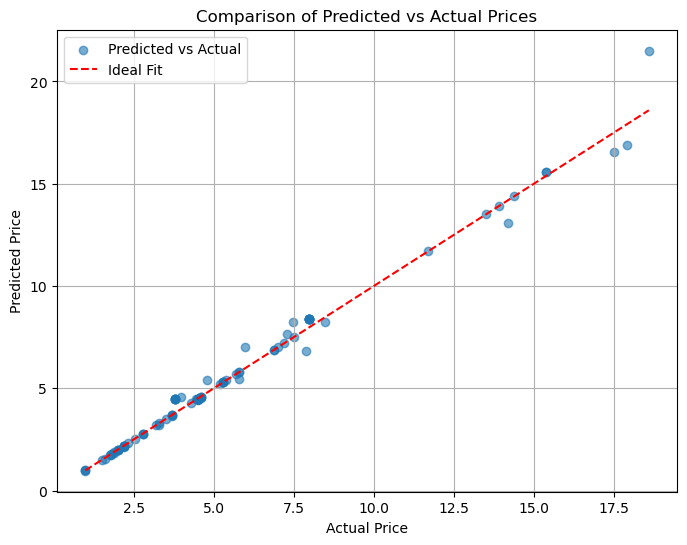

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_actual_price, y_pred_price, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_actual_price.min(), y_actual_price.max()], [y_actual_price.min(), y_actual_price.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Comparison of Predicted vs Actual Prices')
plt.legend()
plt.grid()
plt.show()


In [40]:
actual.to_csv("C:/Users/User/Desktop/utem_pj/results_files.csv", index=False)


In [42]:
# Calculate the range of ActualPrice
price_min = actual['ActualPrice'].min()
price_max = actual['ActualPrice'].max()
price_range = price_max - price_min

print(f"Price Range: {price_min} - {price_max} MR")
print(f"Range Width: {price_range} MR")


Price Range: 0.99 - 18.59105 MR
Range Width: 17.60105 MR


In [44]:
actual['PriceDifference'] = actual['ActualPrice'] - actual['PredictedPrice']
print(actual[['Description', 'ActualPrice', 'PredictedPrice', 'PriceDifference']].head())


                              Description  ActualPrice  PredictedPrice  \
0          QL DELI FRESH CLASSIC EGG 10'S          4.5         4.50000   
1             MILO ICE CREAM STICK FROZEN          1.6         1.53936   
2        KG SPRING ROLL PASTRY 500G (8.5)          7.0         7.00000   
3  HEAVEN & EARTH 500ML (BTL) - MANGO TEA          2.2         2.11200   
4  HEAVEN & EARTH 300ML (TIN) - MANGO TEA          1.5         1.50000   

   PriceDifference  
0          0.00000  
1          0.06064  
2          0.00000  
3          0.08800  
4          0.00000  


In [46]:

# Save the trained model and encoder
joblib.dump(model, "trained_knn_model.pkl")
joblib.dump(target_encoder, "target_encoder.pkl")
print("Model and encoder saved successfully.")

Model and encoder saved successfully.


In [48]:
# import os
# import joblib

# # Define the directory where you want to save the files
# save_directory = "C:/Users/aminah/OneDrive/Desktop/final project @UTeM/model_files/"

# # Create the directory if it doesn't exist
# os.makedirs(save_directory, exist_ok=True)

# # Save the trained model and encoder
# joblib.dump(model, f"{save_directory}trained_knn_model.pkl")
# joblib.dump(target_encoder, f"{save_directory}target_encoder.pkl")
# print("Model and encoder saved successfully.")
